# Student Habits vs Academic Performance
Predict the final exams based on the features

##Import Datasets

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


student = pd.read_csv('/content/student_habits_performance.csv')
student

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [35]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [37]:
student.non_numeric = student.select_dtypes(object)
student.non_numeric.columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [36]:
student.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
student.parental_education_level.describe()

,parental_education_level
count,909
unique,3
top,High School
freq,392


##EDA

### Numeric overview plot
What we want to know:
1. Distibution of key features: What do the overall distributions look like for study hours, nightly sleep duration, and daily social-media usage?
2. Simple Correlations: How strongly do individual lifestyle factors (e.g. study hours, sleep quality, diet score) correlate with final exam score?
3. Group comparision: What is the average exam score for students who sleep < 6 hrs vs. those who sleep > 8 hrs?
4. Feature Interaction Heatmap: Build a heatmap of pairwise Pearson (or Spearman) correlations among all 15+ features plus final score—any surprising clusters?
5. Binned Study Hours vs. Score: Divide study-hours into bins (e.g. 0–2 hrs, 2–4 hrs, …) and plot mean exam score per bin with error bars. Where are diminishing returns?
6. Mental Health × Performance Breakdown: Segment students by mental-health rating (e.g. low/medium/high) and compare distributions of all major habits (sleep, diet, screen time) across those groups
7. Multivariate Interaction Effects: Using a 3D scatter or partial-dependence plot, examine how combinations of two habits (e.g. sleep × social-media use) jointly impact exam score, controlling for a third (e.g. study hours)
8. Clustering & Profile Analysis: Perform clustering (e.g. K-means or hierarchical) on lifestyle features to discover distinct “student lifestyle archetypes,” then profile each cluster’s mean exam score and feature patterns.







### 1. What do the overall distributions look like for study hours, nightly sleep duration, and daily social-media usage?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours_per_day'}>,
        <Axes: title={'center': 'social_media_hours'}>],
       [<Axes: title={'center': 'netflix_hours'}>,
        <Axes: title={'center': 'attendance_percentage'}>,
        <Axes: title={'center': 'sleep_hours'}>],
       [<Axes: title={'center': 'exercise_frequency'}>,
        <Axes: title={'center': 'mental_health_rating'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

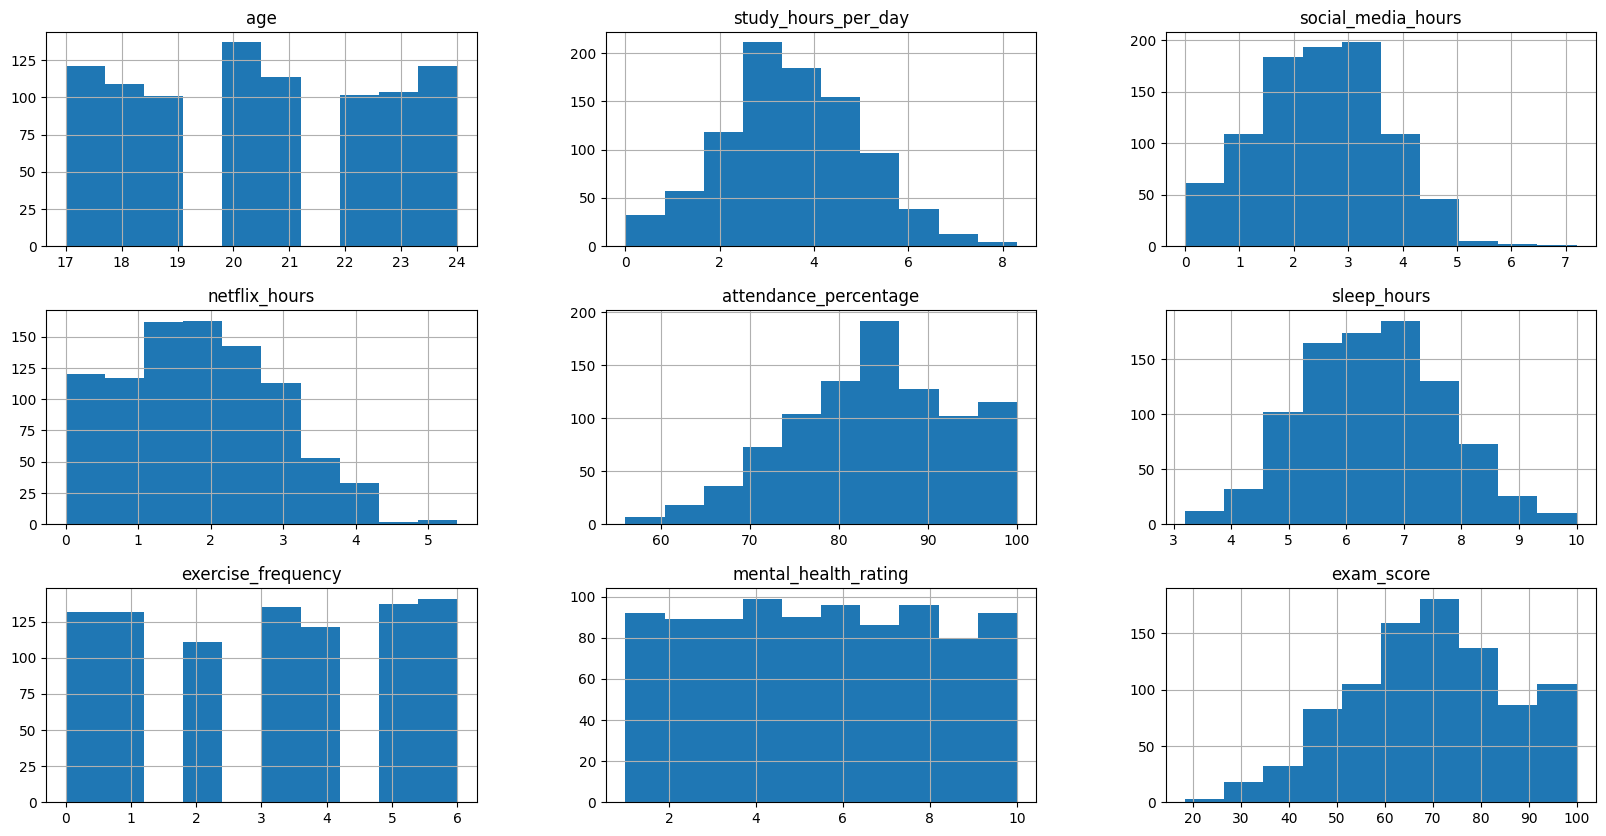

In [ ]:
student.hist(figsize=(20,10))

# Based on the finding, we can tell that students usually spend aroung 2-3 hours a day to study
# Also, they usually sleep for 6-8 hours a day
# Daily social_media_hours will be around 2-4 hours a day

### 2. How strongly do individual lifestyle factors (e.g. study hours, sleep quality, diet score) correlate with final exam score?

Text(0.5, 1.0, 'Distribution of Exam Scores')

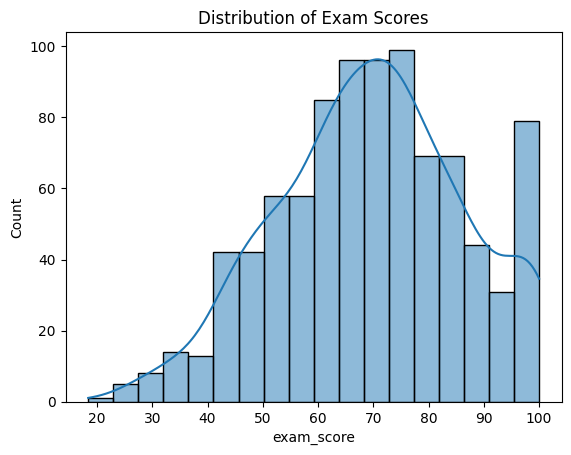

In [ ]:
sns.histplot(data = student, x = 'exam_score', kde='True')
plt.title('Distribution of Exam Scores')

In [ ]:
student_numeric = student.select_dtypes(np.number)
student_correlation = student_numeric.corr()
student_correlation

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.007150,-0.023854,0.005841,-0.030203,0.040498,-0.005718,-0.052137,-0.012833
study_hours_per_day,0.007150,1.000000,0.007364,-0.014493,0.028967,-0.026241,-0.024708,-0.015896,0.822950
social_media_hours,-0.023854,0.007364,1.000000,0.011865,0.049356,0.026861,-0.023975,-0.000417,-0.171672
netflix_hours,0.005841,-0.014493,0.011865,1.000000,-0.015008,-0.017006,-0.004155,-0.016612,-0.166578
attendance_percentage,-0.030203,0.028967,0.049356,-0.015008,1.000000,0.001972,-0.010563,-0.017096,0.096005
sleep_hours,0.040498,-0.026241,0.026861,-0.017006,0.001972,1.000000,0.030013,-0.010653,0.122294
exercise_frequency,-0.005718,-0.024708,-0.023975,-0.004155,-0.010563,0.030013,1.000000,-0.001500,0.161397
mental_health_rating,-0.052137,-0.015896,-0.000417,-0.016612,-0.017096,-0.010653,-0.001500,1.000000,0.317945
exam_score,-0.012833,0.822950,-0.171672,-0.166578,0.096005,0.122294,0.161397,0.317945,1.000000


<Axes: >

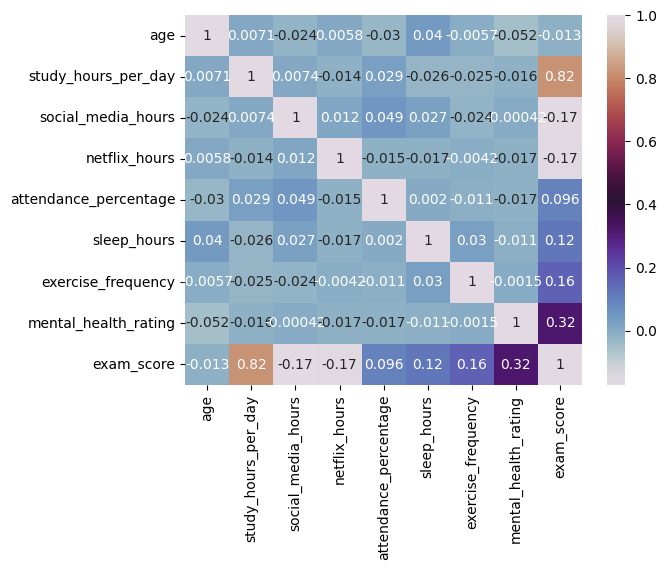

In [ ]:
sns.heatmap(
    student_correlation,
    annot=True,
    cmap = 'twilight'
)

# study_hours_per_day is the strongest factor correlate with final exam scores
# following mental_health_rating

### 3. What is the average exam score for students who sleep < 6 hrs vs. those who sleep > 8 hrs?



In [ ]:
student_6h = student[student.sleep_hours < 6]
student_8h = student[student.sleep_hours > 8]

print('Student with <6h sleep will have:', student_6h.exam_score.mean(), 'points in exam')
print('Student with >8h sleep will have:', student_8h.exam_score.mean(), 'points in exam')

Student with <6h sleep will have: 67.6234726688103 points in exam
Student with >8h sleep will have: 71.4223404255319 points in exam


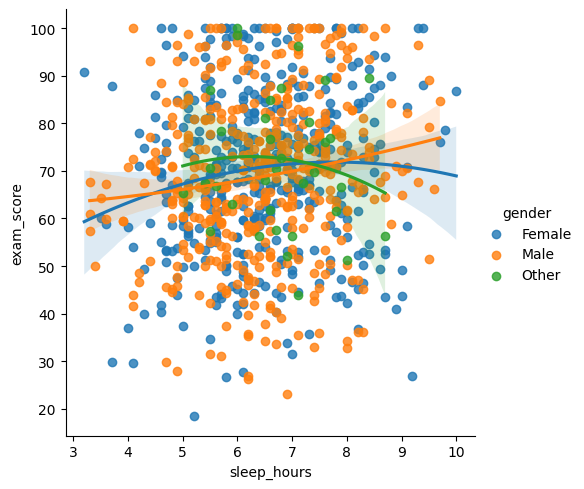

In [ ]:
from keyword import kwlist
sns.lmplot(data = student,
           x = 'sleep_hours',
           y = 'exam_score',
           hue = 'gender',
           order = 2)

### 4. Build a heatmap of pairwise Pearson (or Spearman) correlations among all 15+ features plus final score—any surprising clusters?

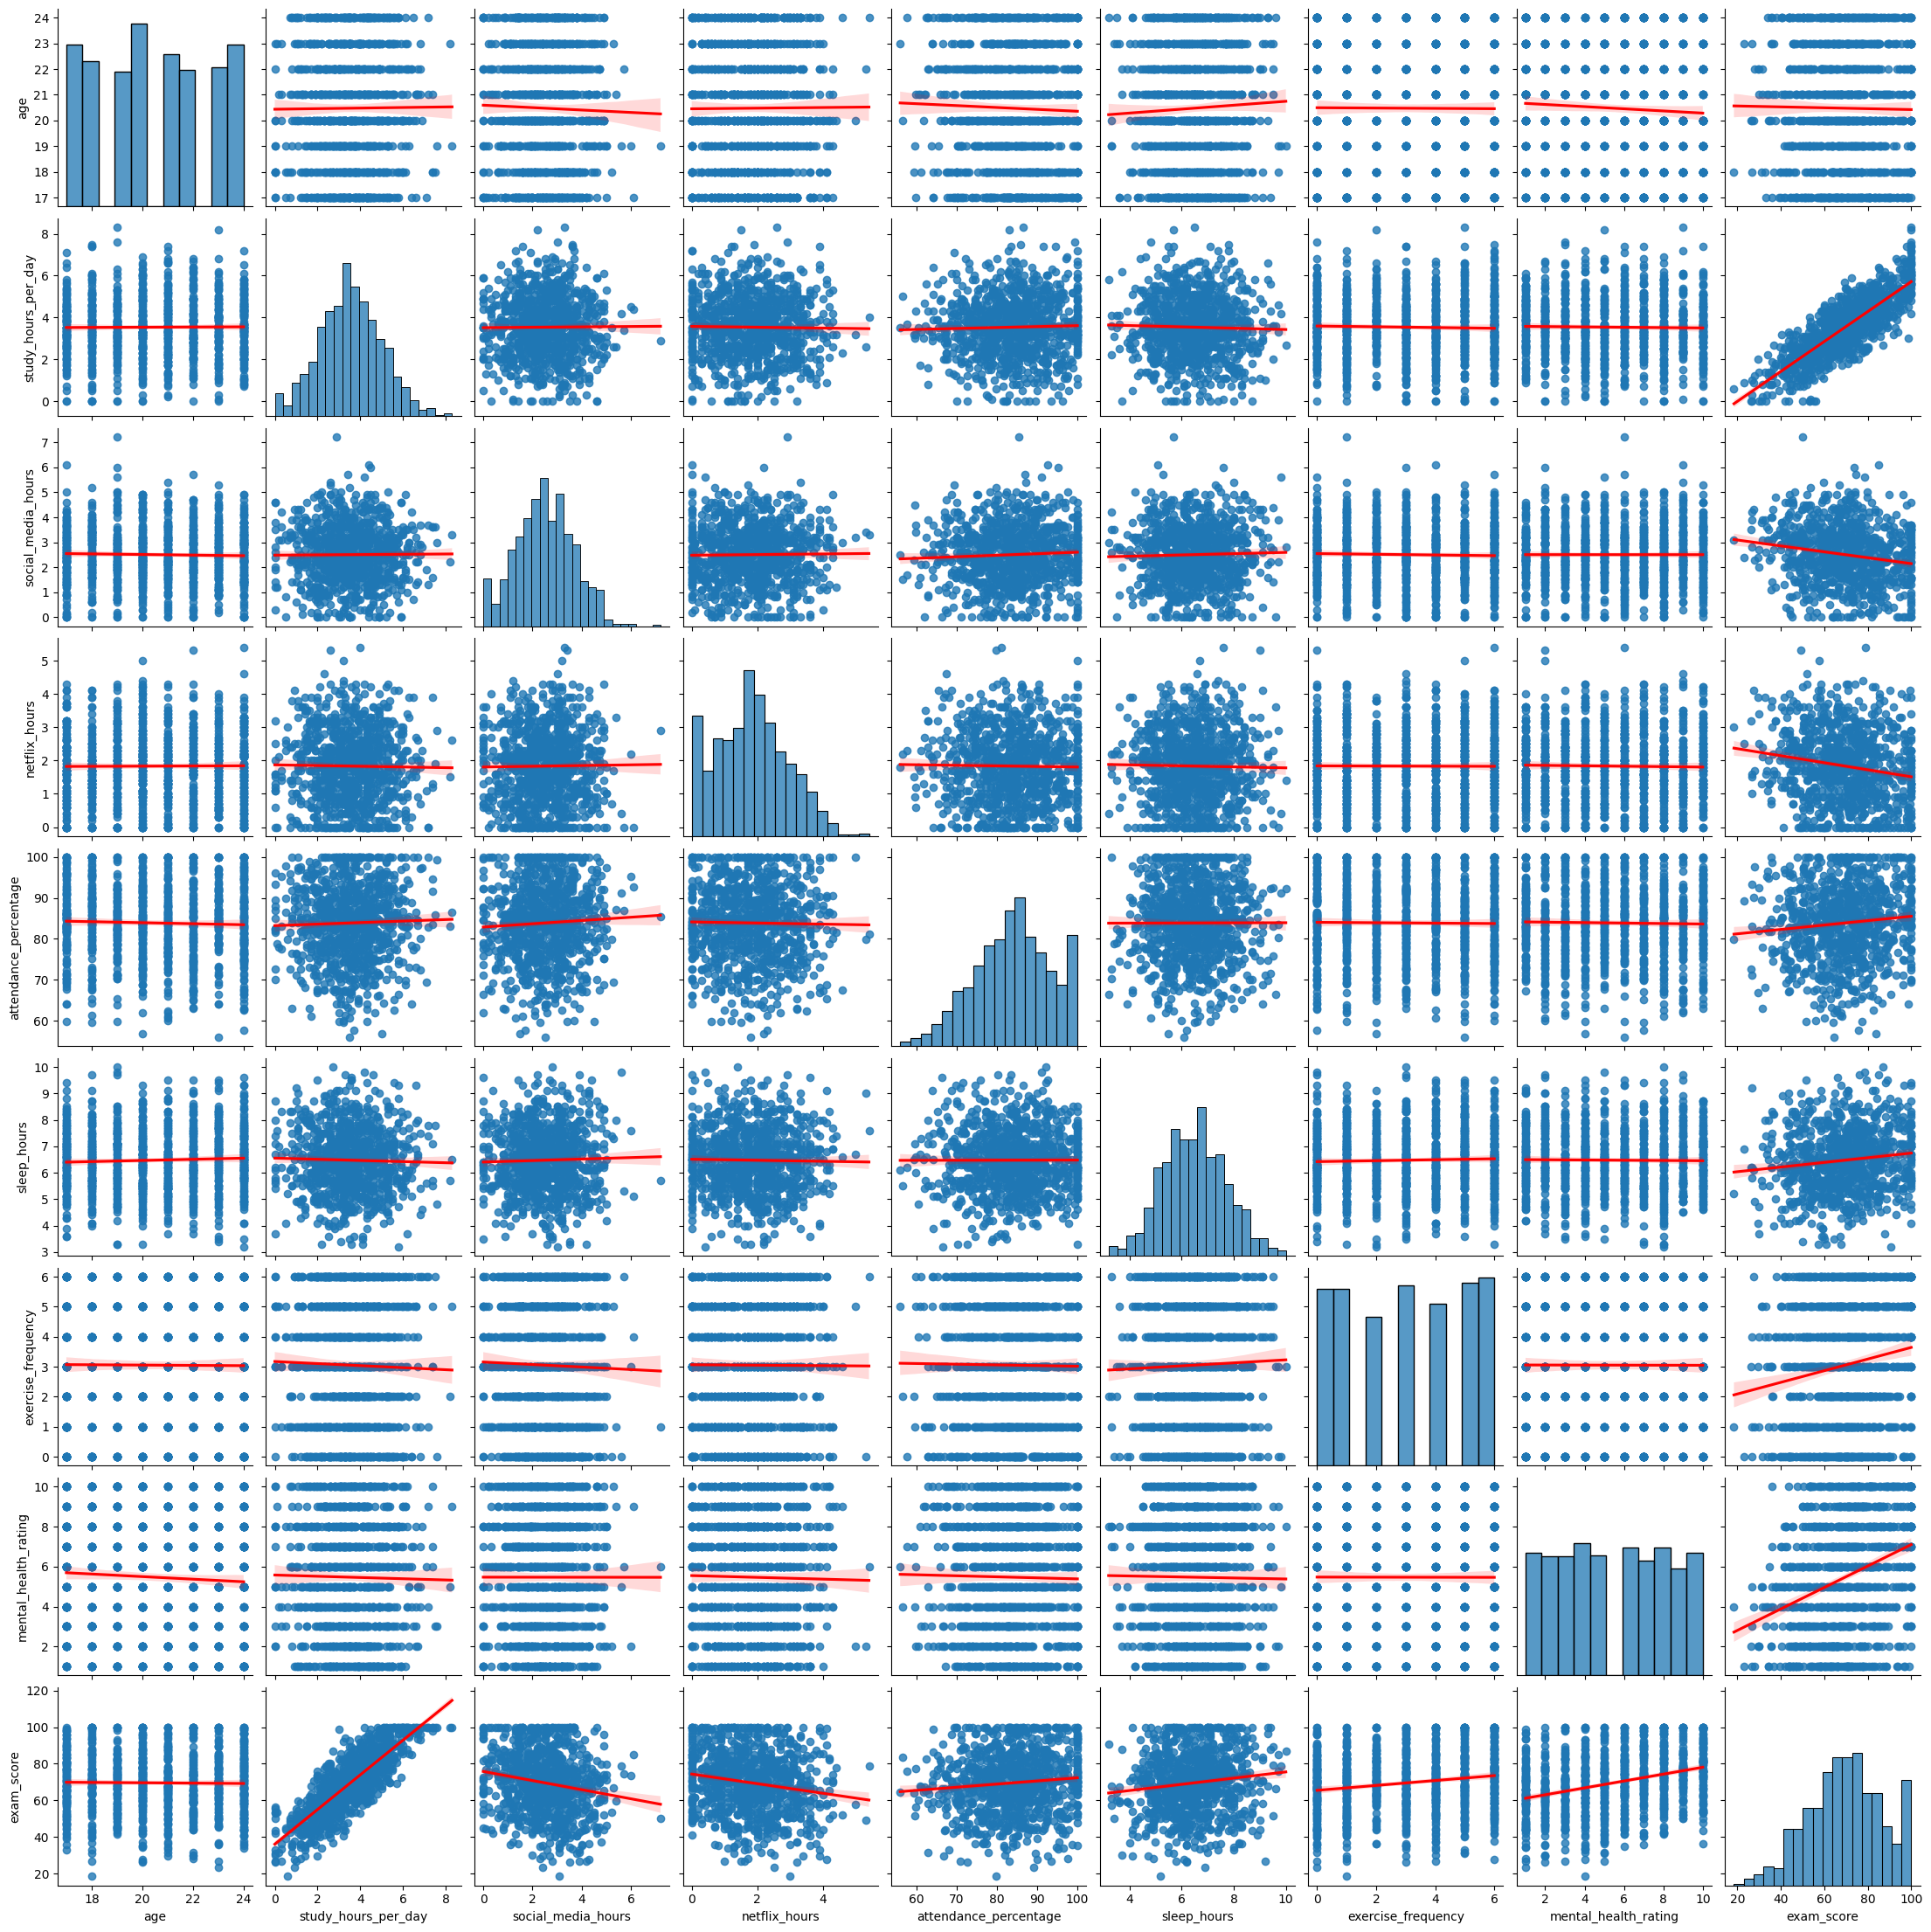

In [ ]:
sns.pairplot(
    data = student.select_dtypes(np.number),
    kind = 'reg',
    plot_kws = {'line_kws':{'color':'red'}}
)

# This tells us that the more hours student spend studying, the greater their exam scores
# One thing worth noticing is that age seems not to be an important aspect when it comes to exam_score

### 5. Divide study-hours into bins (e.g. 0–2 hrs, 2–4 hrs, …) and plot mean exam score per bin with error bars. Where are diminishing returns?

In [ ]:
student.study_hours_per_day.unique()

student['hour_cat'] = pd.cut(student.study_hours_per_day,
                          bins=[-0.01, 2.0, 4.0, 6.0, 8.31],
                          labels=[1,2,3,4])

student['hour_cat'].value_counts()

<ipython-input-100-8ff6264bd9e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student['hour_cat'] = pd.cut(student.study_hours_per_day,


,count
hour_cat,
2,438
3,287
1,144
4,40


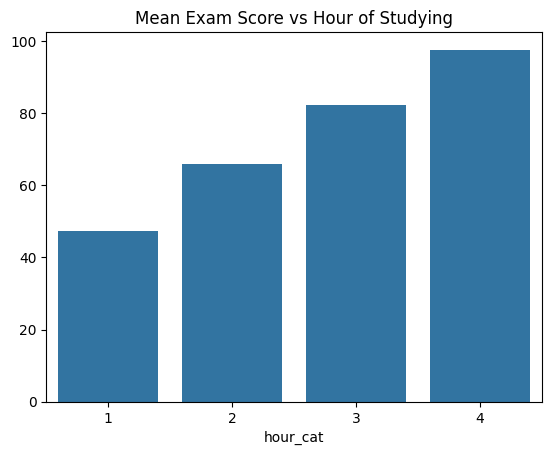

In [ ]:
grouped = student.groupby('hour_cat', observed=True).exam_score.mean()

sns.barplot(x = grouped.index,
            y = grouped.values,
            errorbar=('ci', 95))
plt.title('Mean Exam Score vs Hour of Studying')
plt.show()

### 6. Segment students by mental-health rating (e.g. low/medium/high) and compare distributions of all major habits (sleep, diet, screen time) across those groups.

In [11]:
student.mental_health_rating.unique()

student.mental_health_rating.value_counts()

# Cut mental_heatlth_rating thành 3 loại: low-medium-high

student['new_mental_rating'] = pd.cut(
    student.mental_health_rating,
    bins=[-0.01, 3, 7, 10.01],
    labels=['low', 'medium', 'high']
)

student

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,new_mental_rating
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,high
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,high
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,low
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,low
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,medium
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,medium
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,high
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,low


<Axes: xlabel='new_mental_rating', ylabel='exam_score'>

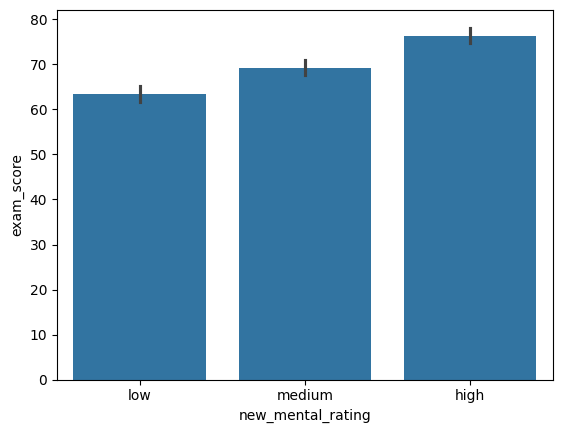

In [13]:
sns.barplot(
    data = student,
    x = 'new_mental_rating',
    y = 'exam_score',
)

<Axes: xlabel='diet_quality', ylabel='exam_score'>

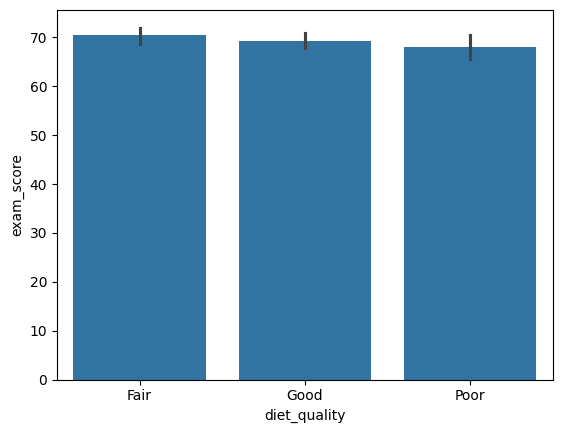

In [15]:
sns.barplot(
    data = student,
    x = 'diet_quality',
    y = 'exam_score',
)

###Non-numeric Columns Overview

In [ ]:
def print_non_num(student):
  for i in student.non_numeric.columns:
    print(student[i].value_counts(), '\n')
print_non_num(student)

student_id
S1999    1
S1000    1
S1001    1
S1002    1
S1003    1
        ..
S1018    1
S1017    1
S1016    1
S1015    1
S1014    1
Name: count, Length: 909, dtype: int64 

gender
Male      440
Female    433
Other      36
Name: count, dtype: int64 

part_time_job
No     713
Yes    196
Name: count, dtype: int64 

diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64 

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64 

internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64 

extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64 



<Axes: xlabel='gender', ylabel='exam_score'>

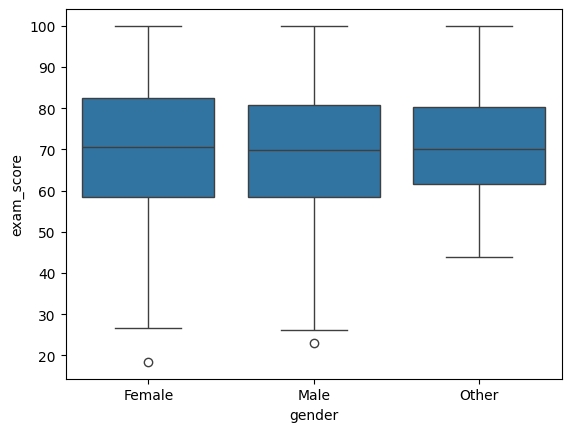

In [ ]:
sns.boxplot(data=student,
            x=student.gender,
            y=student.exam_score)

<Axes: xlabel='parental_education_level', ylabel='exam_score'>

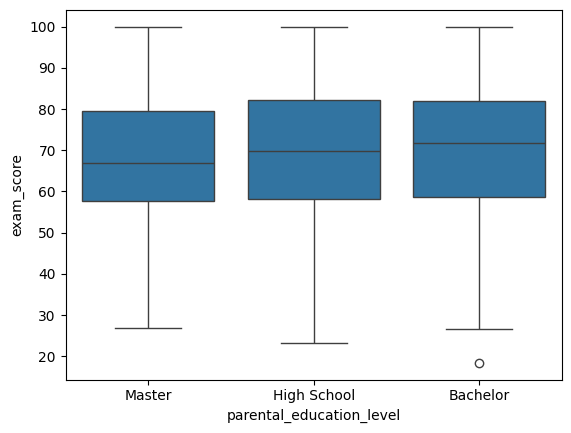

In [ ]:
sns.boxplot(data=student,
            x=student.parental_education_level,
            y=student.exam_score)

<Axes: xlabel='attendance_percentage', ylabel='exam_score'>

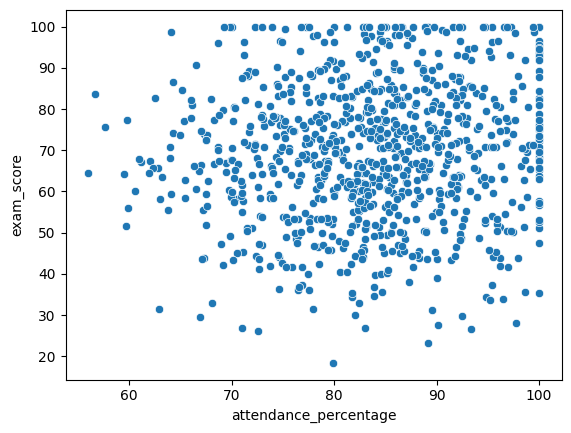

In [ ]:
sns.scatterplot(data=student,
                y='exam_score',
                x='attendance_percentage')

## Preprocessing

In [115]:
# Checking exam score
student.exam_score.describe()

,exam_score
count,1000.000000
mean,69.601500
std,16.888564
min,18.400000
25%,58.475000
50%,70.500000
75%,81.325000
max,100.000000


<Axes: >

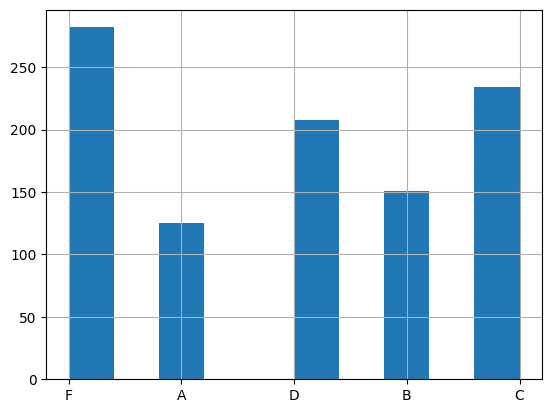

In [116]:
student['word_exam_score'] = pd.cut(student.exam_score,
                                    bins=[0,60,70,80,90,100.1],
                                    labels=['F','D','C','B','A'])
student['word_exam_score'].value_counts()

student.word_exam_score.hist()

In [117]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in split.split(student, student.word_exam_score):
  train_set = student.loc[train_set]
  test_set = student.loc[test_set]

In [118]:
train_set

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,word_exam_score
752,S1752,18,Male,4.5,1.6,2.9,Yes,72.3,4.4,Good,3,High School,Good,4,Yes,71.3,C
748,S1748,17,Female,1.7,2.0,2.4,No,79.4,6.5,Good,5,High School,Average,8,No,45.7,F
94,S1094,22,Female,5.3,1.0,2.2,No,72.6,4.5,Fair,0,High School,Average,8,No,81.3,B
841,S1841,24,Male,3.3,1.5,1.8,Yes,81.4,6.9,Fair,5,High School,Average,6,No,62.6,D
584,S1584,22,Female,2.1,0.0,0.7,No,77.5,6.1,Good,0,Bachelor,Average,5,No,52.5,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,S1479,20,Female,1.9,3.0,2.3,No,91.4,5.7,Good,5,Bachelor,Good,4,No,43.3,F
207,S1207,20,Female,2.1,0.5,2.0,No,80.9,7.3,Poor,3,Bachelor,Good,6,Yes,62.3,D
311,S1311,23,Female,2.6,5.3,1.7,Yes,69.4,7.3,Good,5,Bachelor,Average,10,No,67.0,D
760,S1760,20,Male,0.5,1.6,3.8,Yes,81.0,7.7,Good,4,NaN,Average,3,Yes,30.2,F


In [119]:
train_set

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,word_exam_score
752,S1752,18,Male,4.5,1.6,2.9,Yes,72.3,4.4,Good,3,High School,Good,4,Yes,71.3,C
748,S1748,17,Female,1.7,2.0,2.4,No,79.4,6.5,Good,5,High School,Average,8,No,45.7,F
94,S1094,22,Female,5.3,1.0,2.2,No,72.6,4.5,Fair,0,High School,Average,8,No,81.3,B
841,S1841,24,Male,3.3,1.5,1.8,Yes,81.4,6.9,Fair,5,High School,Average,6,No,62.6,D
584,S1584,22,Female,2.1,0.0,0.7,No,77.5,6.1,Good,0,Bachelor,Average,5,No,52.5,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,S1479,20,Female,1.9,3.0,2.3,No,91.4,5.7,Good,5,Bachelor,Good,4,No,43.3,F
207,S1207,20,Female,2.1,0.5,2.0,No,80.9,7.3,Poor,3,Bachelor,Good,6,Yes,62.3,D
311,S1311,23,Female,2.6,5.3,1.7,Yes,69.4,7.3,Good,5,Bachelor,Average,10,No,67.0,D
760,S1760,20,Male,0.5,1.6,3.8,Yes,81.0,7.7,Good,4,NaN,Average,3,Yes,30.2,F


In [120]:
student = student.drop(columns=['word_exam_score', 'exam_score'], axis=1)
student = student.drop(columns=['parental_education_level'], axis=1)

In [121]:
student

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No


In [186]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# One Hot Encoder for Female, Part-time-job
gender_cat = student[['gender']]
part_time_cat = student[['part_time_job']]
extra_cat = student[['extracurricular_participation']]

one_hot_encoder1 = OneHotEncoder()

gender_1hot = one_hot_encoder1.fit_transform(gender_cat)

one_hot_encoder2= OneHotEncoder()
part_time_1hot = one_hot_encoder2.fit_transform(part_time_cat)

one_hot_encoder3 = OneHotEncoder()
extra_1hot = one_hot_encoder3.fit_transform(extra_cat)

In [187]:
diet_cat = student[['diet_quality']]

ordinal_encoder = OrdinalEncoder(categories=[['Poor','Fair','Good']])
diet_ordinal = ordinal_encoder.fit_transform(diet_cat)

diet_ordinal[:5]

array([[1.],
       [2.],
       [0.],
       [0.],
       [1.]])

In [188]:
internet_cat = student[['internet_quality']]

ordinal_encoder = OrdinalEncoder(categories=[['Poor','Average','Good']])
internet_ordinal = ordinal_encoder.fit_transform(internet_cat)

internet_ordinal[:5]

array([[1.],
       [1.],
       [0.],
       [2.],
       [2.]])

In [189]:
ordinal_column = student[['diet_quality', 'internet_quality']]
one_hot_column = student[['gender', 'part_time_job', 'extracurricular_participation']]
numeric_column = student.drop(columns=['gender', 'part_time_job', 'diet_quality', 'internet_quality','student_id', 'extracurricular_participation'], axis=1)

print(ordinal_column.columns)
print(one_hot_column.columns)
print(numeric_column.columns)


Index(['diet_quality', 'internet_quality'], dtype='object')
Index(['gender', 'part_time_job', 'extracurricular_participation'], dtype='object')
Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating'],
      dtype='object')


In [190]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

student_num_tr = num_pipeline.fit_transform(numeric_column)

num_attr = list(numeric_column.columns)
non_num_1_hot = list(one_hot_column.columns)
non_num_ord = list(ordinal_column.columns)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('1hot', OneHotEncoder(), non_num_1_hot),
    ('ord', OrdinalEncoder(), non_num_ord)
])

student_prepared = full_pipeline.fit_transform(student)

In [191]:
student_prepared

array([[ 1.08455114, -2.41806844, -1.11406369, ...,  1.        ,
         0.        ,  0.        ],
       [-0.21586989,  2.28170684,  0.25131502, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.21760379, -1.46449085,  0.50732352, ...,  0.        ,
         2.        ,  2.        ],
       ...,
       [-0.21586989, -0.37468788,  0.08064268, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.51802481,  1.26001656,  1.36068521, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64934357,  0.51077703,  0.33665119, ...,  0.        ,
         1.        ,  0.        ]])

In [193]:
# Convert everything to dataframe
cols = list(numeric_column.columns) + one_hot_encoder1.categories_[0].tolist() + one_hot_encoder2.categories_[0].tolist() + one_hot_encoder3.categories_[0].tolist() + ['diet_quality','internet_quality']
student_prepared_df = pd.DataFrame(student_prepared, columns=cols)
student_prepared_df

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,Female,Male,Other,No,Yes,No,Yes,diet_quality,internet_quality
0,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0
3,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
4,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.217604,-0.647139,-1.711417,-0.204452,-0.759132,0.840211,-0.514718,0.197465,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
996,-1.516291,-0.442801,-1.284736,0.540025,0.198871,0.269138,-1.008689,0.197465,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
997,-0.215870,-0.374688,0.080643,-0.483631,-2.366448,0.024393,0.967195,1.251547,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
998,1.518025,1.260017,1.360685,-0.669750,1.689097,0.921793,-1.502660,-1.559339,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Model Training

In [195]:
for set_ in (train_set, test_set):
    set_.drop("word_exam_score", axis=1, inplace=True)

In [196]:
student_labels = train_set['exam_score'].copy()
student_labels

,exam_score
752,71.3
748,45.7
94,81.3
841,62.6
584,52.5
...,...
479,43.3
207,62.3
311,67.0
760,30.2


In [199]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb


lin_reg = LinearRegression()
train_set_features = train_set.drop("exam_score", axis=1)
student_prepared_train = full_pipeline.fit_transform(train_set_features)
lin_reg.fit(student_prepared_train, student_labels)

LinearRegression()

In [202]:
#Calculating R2, RMSE

from sklearn.metrics import mean_squared_error

student_predictions = lin_reg.predict(student_prepared_train)
lin_mse = mean_squared_error(student_labels, student_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(student_labels, student_predictions)
print('RMSE:', lin_rmse)
print('R2:', lin_r2)

RMSE: 5.292579638979667
R2: 0.900890964697272
